# Purpose
to explore data stored in csvs of RFID check ins from stony ford wedge 6 (2021)
and now wedge 4 (2022)

# Imports

In [1]:
import numpy as np
import pandas as pd
import glob, os, sys
import matplotlib.pyplot as plt

In [2]:
os.listdir('../data')

['mouse.obidms',
 'aligned_reads.fastq',
 '2021_stonyford_wedge6_block1.csv',
 'taxdump',
 'wolf_tutorial',
 'Sample_PCR5_PWK_2.fastq',
 '2021_stonyford_wedge6_metadata.csv',
 '20220622',
 'Sample_PCR2_PWK_2.fastq',
 'taxdump.tar.gz',
 'wolf.obidms',
 'EMBL',
 'Sample_PCR3_PWK_1.fastq',
 'Sample_PCR3_PWK_2.fastq',
 '2021_stonyford_wedge6_block2.csv',
 'Sample_PCR5_PWK_1.fastq']

In [13]:
rfid2021_blk1=pd.read_csv('../data/2021_stonyford_wedge6_block1.csv')
rfid2021_blk2=pd.read_csv('../data/2021_stonyford_wedge6_block2.csv')
meta2022=pd.read_csv('../data/2022 Mouse Metadata.csv')
meta2021=pd.read_csv('../data/2021_stonyford_wedge6_metadata.csv')
rfid2022=pd.read_csv('../data/W4.CI.for.Emily.csv')

# Functions

# Use case

# Procedure

In [14]:
rfid2022

,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location
0,2022-07-28 03:53:00,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,3,53,0,07-28,Wedge 4,Feeder
1,2022-07-28 02:34:49,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,34,49,07-28,Wedge 4,Feeder
2,2022-07-28 02:13:57,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,57,07-28,Wedge 4,Feeder
3,2022-07-28 02:13:52,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,52,07-28,Wedge 4,Feeder
4,2022-07-28 02:13:42,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,42,07-28,Wedge 4,Feeder
...,...,...,...,...,...,...,...,...,...,...,...
14422,2022-06-16 17:52:17,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,17,06-16,Wedge 4,Feeder
14423,2022-06-16 17:52:01,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,1,06-16,Wedge 4,Feeder
14424,2022-06-16 17:51:36,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,36,06-16,Wedge 4,Feeder
14425,2022-06-16 17:51:04,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,4,06-16,Wedge 4,Feeder


In [15]:
np.unique(rfid2022.Mouse)

array([2001, 2003, 2005, 2021, 2023, 2027, 2031, 2039, 2043, 2049, 2065,
       2067, 2069, 2071, 2073, 2077])

In [46]:
rfid2022_0705 = rfid2022[rfid2022.Day=='07-03']
rfid2022_0705 = rfid2022_0705[rfid2022_0705.Location=='Feeder']
rfid2022_0705=rfid2022_0705.reset_index()
len(rfid2022_0705)

316

,index,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location
0,6078,2022-07-05 23:12:14,wedge22,48 48 48 49 51 48 51 51 55,2065,2022-07-05,23,12,14,07-05,Wedge 4,Feeder
1,6079,2022-07-05 23:11:55,wedge22,48 48 48 49 51 48 51 51 55,2065,2022-07-05,23,11,55,07-05,Wedge 4,Feeder
2,6087,2022-07-05 21:37:54,wedge22,48 48 48 49 51 48 51 53 53,2073,2022-07-05,21,37,54,07-05,Wedge 4,Feeder
3,6088,2022-07-05 21:36:34,wedge22,48 48 48 49 51 48 51 53 53,2073,2022-07-05,21,36,34,07-05,Wedge 4,Feeder
4,6089,2022-07-05 21:36:32,wedge22,48 48 48 49 51 48 51 53 53,2073,2022-07-05,21,36,32,07-05,Wedge 4,Feeder
...,...,...,...,...,...,...,...,...,...,...,...,...
191,6344,2022-07-05 00:18:41,wedge22,48 48 48 49 51 48 51 53 53,2073,2022-07-05,0,18,41,07-05,Wedge 4,Feeder
192,6345,2022-07-05 00:18:26,wedge22,48 48 48 49 51 48 51 50 52,2077,2022-07-05,0,18,26,07-05,Wedge 4,Feeder
193,6346,2022-07-05 00:18:20,wedge22,48 48 48 49 51 48 51 50 52,2077,2022-07-05,0,18,20,07-05,Wedge 4,Feeder
194,6347,2022-07-05 00:11:33,wedge22,48 48 48 49 51 48 51 53 53,2073,2022-07-05,0,11,33,07-05,Wedge 4,Feeder


In [47]:
rfid_sub = rfid2022_0705.copy()
for x in np.arange(0,18):
    rfid_sub['abs_time_min']=((rfid_sub.Hour*60)+(rfid_sub.Minute)+rfid_sub.Second/(60))

(455.4, 470.0)

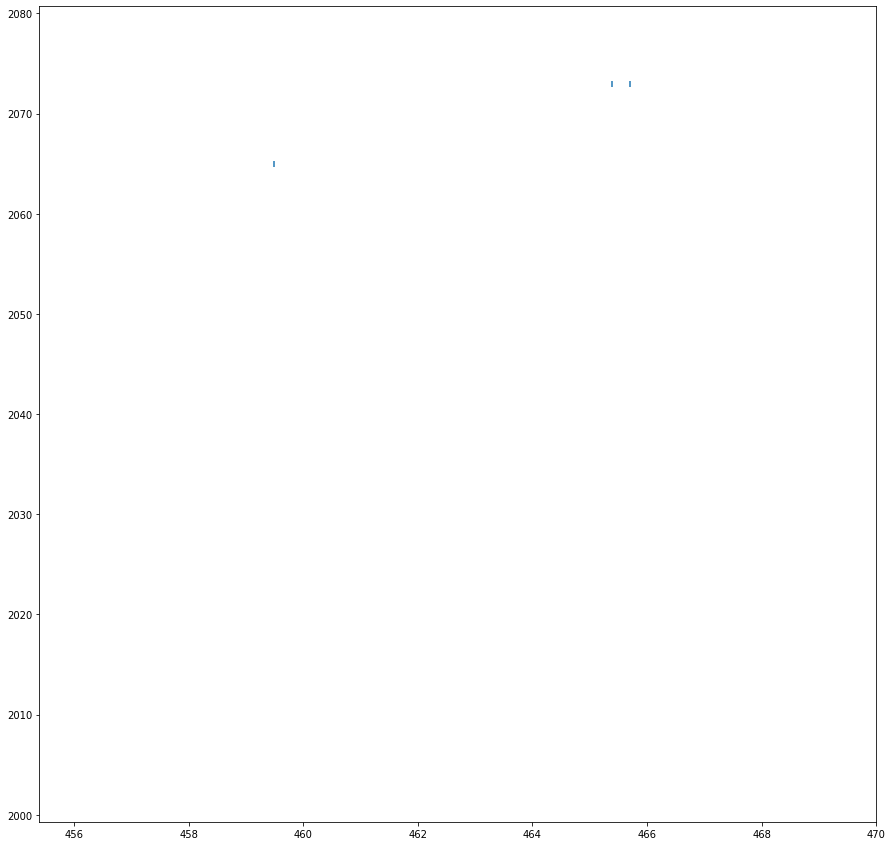

In [127]:
plt.figure(figsize=(15,15))
plt.scatter(rfid_sub.abs_time_min,rfid_sub.Mouse,marker='|')
plt.xlim(455.4,470)
#plt.ylim(2001,2080)

In [123]:
val=453.485
print(np.floor(val/60), np.floor(val%60), round(((val%60)-np.floor(val%60))*60))

7.0 33.0 29


In [97]:
(7*60)+32

452

In [ ]:
# video at 7/3 8:30:04 
    # RFID to 8:29:45
# 7:16 am video is 2022070605B_240
# at 7:16am 7/3 there are two mice inside,
# at 7:16:05 another joins
# at 7:16:23 one leaves, it's not the one that arrived at 16:05
# 20220706_05B_241 by 17:31 all are gone, one hangs out in the tunnel 7:32:03-10 and leaves 7:32:18
    # in RFID time, this is 7:31:42, 7:32:06
# 7:33:29 one enters, 
    # in RFID time this is 7:33:30

In [ ]:
np.unique()

In [60]:
meta2022[meta2022.Mouse==2003]['Bleach']

1    F
Name: Bleach, dtype: object

In [41]:
sub = rfid_sub[rfid_sub.abs_time_min<467]
sub = sub[sub.abs_time_min>466]
sub

,index,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location,abs_time_min
59,6150,2022-07-05 07:46:45,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-05,7,46,45,07-05,Wedge 4,Feeder,466.75
60,6151,2022-07-05 07:46:21,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-05,7,46,21,07-05,Wedge 4,Feeder,466.35


In [45]:
meta2022[meta2022.Mouse==2043]

5    F
Name: Bleach, dtype: object

In [ ]:
for mouse in np.unique(rfid_sub.Mouse):
    print("for mouse {}, len = {}".format(mouse, len(rfid_sub[rfid_sub.Mouse==mouse])))

In [105]:
meta2022[meta2022.Mouse==2003]['Bleach']

1    F
Name: Bleach, dtype: object

In [106]:
rfid_sub[rfid_sub.abs_time_min<1300] #2003 F, 2073 HR, 2077 HR, 2039 HL, 2065 HR
    # 001156 animal that was already inside, exits 
    # 001200 other animal fully enters
    # tail last seen 001203 
    
    #212318 enters 7/2 (+5 on 7/02?)
    #212329 another starts to leave, probably triggers around 21:23:33
    #212342 likely same animal that left, returns
    #212447 a third animal enters
    #212531 a fourth animal enters
    # by 212600 it looks like only three  mice remain

,level_0,index,Unnamed: 0,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location,abs_time_min
53,53,7137,7138,2022-07-02 21:39:05,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-02,21,39,5,07-02,Wedge 4,Feeder,1299.083333
54,54,7139,7140,2022-07-02 21:36:47,wedge22,48 48 48 49 51 48 51 51 55,2065,2022-07-02,21,36,47,07-02,Wedge 4,Feeder,1296.783333
55,55,7141,7142,2022-07-02 21:30:19,wedge22,48 48 48 49 51 48 51 51 55,2065,2022-07-02,21,30,19,07-02,Wedge 4,Feeder,1290.316667
56,56,7142,7143,2022-07-02 21:28:15,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-02,21,28,15,07-02,Wedge 4,Feeder,1288.250000
57,57,7143,7144,2022-07-02 21:26:13,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-02,21,26,13,07-02,Wedge 4,Feeder,1286.216667
58,58,7144,7145,2022-07-02 21:25:53,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-02,21,25,53,07-02,Wedge 4,Feeder,1285.883333
59,59,7145,7146,2022-07-02 21:25:38,wedge22,48 48 48 49 51 48 51 57 57,2003,2022-07-02,21,25,38,07-02,Wedge 4,Feeder,1285.633333
60,60,7146,7147,2022-07-02 21:25:37,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-02,21,25,37,07-02,Wedge 4,Feeder,1285.616667
61,61,7148,7149,2022-07-02 21:25:12,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-07-02,21,25,12,07-02,Wedge 4,Feeder,1285.200000
62,62,7151,7152,2022-07-02 21:24:28,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-02,21,24,28,07-02,Wedge 4,Feeder,1284.466667


## mouse video timestamps 7/05
- 00:11:51 - video 353 partial exit, re enter, another mouse on top entering, then exit
- 00:49:44 mouse leaving , looks like back right was bleached?
- 1:31:20 a mouse has recently? entered, 1:31: 33 another mouse enters
- 1:34:50ish a mouse enters, 1:35:06 a second mouse enters
- 1:46 a mouse is inside, leaves 1:46:46
- 2:06 two mice are inside, one quickly leaves
- 2:10 there is a mouse in there

In [37]:
wedge4meta = meta2022[meta2022.Wedge==4]
wedge4SF = wedge4meta[wedge4meta['Lab or SF?']=='SF']

In [42]:
np.unique(wedge4SF.Mouse)
# mice 2037 (43000130258), 2041 (43000130357) don't show at all at feeder

array([2001, 2003, 2005, 2021, 2023, 2027, 2031, 2037, 2039, 2041, 2043,
       2049, 2065, 2067, 2069, 2071, 2073, 2077], dtype=int64)

In [48]:
day = rfid2022.Day[0]
day
print(day[0:2])
print(day[3:5])

07
28


In [64]:
# released on 06-16
# to get continuous x axis, try adding 24 to each incremented number
for day in np.unique(rfid2022.Day):
    if day[0:2]=='06':
        new_day=int(day[3:5])
    else:
        new_day = 30 + int(day[3:5])
    rfid2022.loc[rfid2022['Day']==day,['Day']] = new_day


In [67]:
rfid2022

,Unnamed: 0,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location
0,1,2022-07-28 03:53:00,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,3,53,0,58,Wedge 4,Feeder
1,2,2022-07-28 02:34:49,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,34,49,58,Wedge 4,Feeder
2,3,2022-07-28 02:13:57,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,57,58,Wedge 4,Feeder
3,4,2022-07-28 02:13:52,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,52,58,Wedge 4,Feeder
4,5,2022-07-28 02:13:42,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,42,58,Wedge 4,Feeder
...,...,...,...,...,...,...,...,...,...,...,...,...
14422,14423,2022-06-16 17:52:17,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,17,16,Wedge 4,Feeder
14423,14424,2022-06-16 17:52:01,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,1,16,Wedge 4,Feeder
14424,14425,2022-06-16 17:51:36,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,36,16,Wedge 4,Feeder
14425,14426,2022-06-16 17:51:04,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,4,16,Wedge 4,Feeder


In [117]:
from matplotlib.patches import Rectangle

In [49]:
rfid2022_feeder = rfid2022[rfid2022.Location=='Feeder']
rfid2022_nonfeeder=rfid2022[rfid2022.Location!='Feeder']

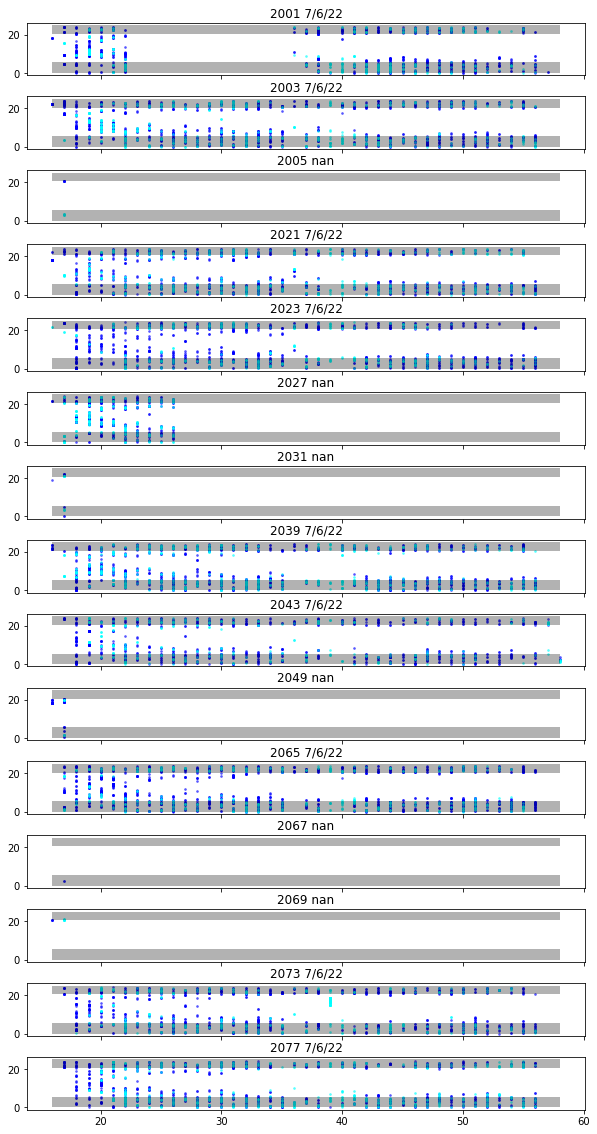

In [155]:
x=-1
fig,ax = plt.subplots(len(np.unique(rfid2022_feeder.Mouse)),1,sharex=True,sharey=True,figsize=(10,20))
fig.subplots_adjust(hspace=0.4)
for mouse in np.unique(rfid2022_feeder.Mouse):
    x=x+1
    df= rfid2022_feeder[rfid2022_feeder.Mouse==mouse]
    ax[x].scatter(df.Day,df.Hour+df.Minute/60,alpha=0.5,s=3,c='b')
    df= rfid2022_nonfeeder[rfid2022_nonfeeder.Mouse==mouse]
    ax[x].scatter(df.Day,df.Hour+df.Minute/60,alpha=0.5,s=3,c='cyan')
    ax[x].add_patch(Rectangle((16,0),42,5.5, facecolor='black',fill=True,alpha=0.3))
    ax[x].add_patch(Rectangle((16,20.5),42,4.5, facecolor='black',fill=True,alpha=0.3))
    suptitle=str(str(mouse) + ' ' + str(wedge4SF[wedge4SF.Mouse==mouse]['Midpoint trap date'].values[0]))
    ax[x].title.set_text(suptitle)

# format dataframe to have relative hours

In [51]:
rfid2022_feeder['month']=''
rfid2022_feeder['day']=''
rfid2022_feeder=rfid2022_feeder.reset_index()
rfid2022_feeder=rfid2022_feeder.drop(columns=['index','Unnamed: 0'])
for idx in rfid2022_feeder.index:
    monthday=rfid2022_feeder.Day[idx]
    rfid2022_feeder.iloc[idx,-2]=monthday[0:2]
    rfid2022_feeder.iloc[idx,-1]=monthday[3:]

C:\Users\dennise\AppData\Local\Temp\ipykernel_22400\1651804282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfid2022_feeder['month']=''
C:\Users\dennise\AppData\Local\Temp\ipykernel_22400\1651804282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfid2022_feeder['day']=''


9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938


In [59]:
rfid2022_feeder.month.astype('int32')

0       7
1       7
2       7
3       7
4       7
       ..
9934    6
9935    6
9936    6
9937    6
9938    6
Name: month, Length: 9939, dtype: int32

In [75]:
rfid2022_feeder['abs_time_hrs']=((((rfid2022_feeder.month.astype('int32')-6)*30)+rfid2022_feeder.day.astype('int32')-16)*24)+(rfid2022_feeder.Hour)+(rfid2022_feeder.Minute/(60))+(rfid2022_feeder.Second/(3600))

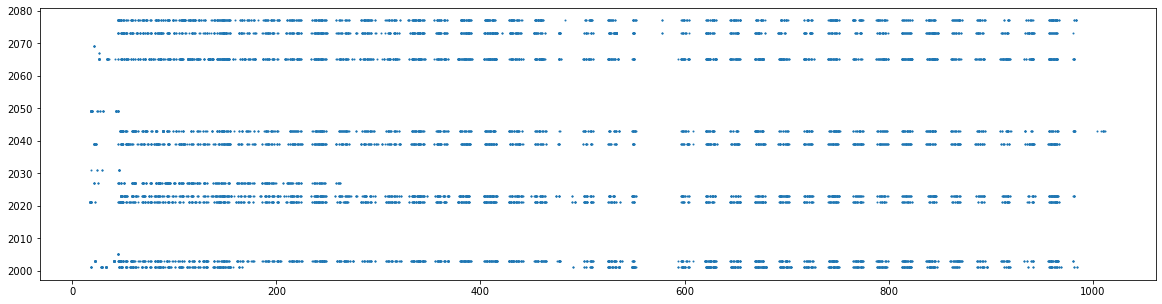

In [82]:
plt.figure(figsize=(20,5))
plt.scatter(rfid2022_feeder.abs_time_hrs,rfid2022_feeder.Mouse,s=1)

# TODO 
would be great to get a dataframe where we have video name, date/timestamp (later, number of animals) and cross compare - how often do we see a video without an RFID ping (should be never for the feeder!) and how often do we see an RFID ping without a video? need to remember that videos are off by a short amount of time, but should be able to sync time at least approximately based on identity of animal and their bleach/tail patterns + timing.

# next: 
want to get some close-in-time arrivals/exits. working through how to do this. 
1. could make, for each animal, an approximate entry/exit time
    - if we assume that the first ping is an entry, and a subsequent ping is an exit, we could mark 'inside' times and 'outside' times and find overlapping 'inside' times.
2. could find, for each ping, the closest ping from another animal and then threshold these and only keep close-in-time ones (let's start with +/-1 minute)

In [85]:
# run for each animal, so start with one animal as example
plt.plot(rfid2022_feeder)

array([2001, 2003, 2005, 2021, 2023, 2027, 2031, 2039, 2043, 2049, 2065,
       2067, 2069, 2073, 2077], dtype=int64)

In [86]:
rfid2022_feeder

,Timestamp,Reader,RFID,Mouse,Date,Hour,Minute,Second,Day,Wedge,Location,month,day,abs_time_hrs
0,2022-07-28 03:53:00,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,3,53,0,07-28,Wedge 4,Feeder,07,28,1011.883333
1,2022-07-28 02:34:49,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,34,49,07-28,Wedge 4,Feeder,07,28,1010.580278
2,2022-07-28 02:13:57,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,57,07-28,Wedge 4,Feeder,07,28,1010.232500
3,2022-07-28 02:13:52,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,52,07-28,Wedge 4,Feeder,07,28,1010.231111
4,2022-07-28 02:13:42,wedge22,48 48 48 49 51 48 50 57 49,2043,2022-07-28,2,13,42,07-28,Wedge 4,Feeder,07,28,1010.228333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,2022-06-16 17:52:17,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,17,06-16,Wedge 4,Feeder,06,16,17.871389
9935,2022-06-16 17:52:01,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,52,1,06-16,Wedge 4,Feeder,06,16,17.866944
9936,2022-06-16 17:51:36,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,36,06-16,Wedge 4,Feeder,06,16,17.860000
9937,2022-06-16 17:51:04,wedge22,48 48 48 48 54 51 55 48 51,2021,2022-06-16,17,51,4,06-16,Wedge 4,Feeder,06,16,17.851111


# Exploration 2021 data

In [3]:
meta

,Cage,Genotype,Left ear tag,Right ear tag,RFID Tag,Location,Wedge,Sex,Lost RFID 1,Lost RFID 2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1
5,5,C57,NaN,356,51 48 50 51 57,SF,6,Female,False,False,Block 1
6,5,C57,199.0,349,51 48 50 54 55,SF,6,Female,True,False,Block 1
7,5,C57,200.0,350,51 48 51 55 49,SF,6,Female,False,False,Block 1
8,6,C57,126.0,376,51 48 50 48 49,SF,6,Female,False,False,Block 1
9,6,C57,130.0,380,51 48 51 49 48,SF,6,Female,False,False,Block 1


In [14]:
colnms=list(meta.columns)

colnms[2]='left_ear_tag'
colnms[3]='right_ear_tag'
colnms[4]='RFID_tag'
colnms[8]='lostRFID1'
colnms[9]='lostRFID2'

meta.columns=colnms
meta.head()

,Cage,Genotype,left_ear_tag,right_ear_tag,RFID_tag,Location,Wedge,Sex,lostRFID1,lostRFID2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1


In [15]:
meta_clean = meta.loc[(meta["lostRFID1"] != True)]
meta_clean.head()

,Cage,Genotype,left_ear_tag,right_ear_tag,RFID_tag,Location,Wedge,Sex,lostRFID1,lostRFID2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1


In [21]:
good_RFIDs=[row.RFID_tag for index,row in meta_clean.iterrows()]

In [22]:
good_RFIDs

['51 48 50 51 48',
 '51 48 51 57 57',
 '51 48 51 53 55',
 '51 48 51 48 50',
 '51 48 50 56 50',
 '51 48 50 51 57',
 '51 48 51 55 49',
 '51 48 50 48 49',
 '51 48 51 49 48',
 '51 48 51 56 51',
 '51 48 51 52 56',
 '51 48 51 56 52',
 '51 48 50 50 50',
 '51 48 51 50 50',
 '48 54 51 55 53 52',
 '49 50 55 56 54 57',
 '48 54 51 55 51 56',
 '49 51 48 50 56 54',
 '48 54 51 55 49 49',
 '48 54 49 48 49 57',
 '48 54 51 55 54 56',
 '48 54 51 55 54 49',
 '48 54 51 55 52 56',
 '48 54 51 55 53 49',
 '48 54 51 55 54 55',
 '48 54 51 55 57 54']

In [ ]:
new_timestamps=[]
for index,row in c1.iterrows():
    timestamp=c1.Timestamp[index]
    timestamp_list=timestamp.split(' ')
    vals=[]
    date=timestamp_list[0].split('/')
    time=timestamp_list[1].split(':')
    final_str='{}{}{}{}{}'.format(date[0].zfill(2),date[1].zfill(2),date[2].zfill(2),time[0].zfill(2),time[1].zfill(2))
    new_timestamps.append(int(final_str))
c1.Timestamp=new_timestamps


In [160]:

new_timestamps=[]
for index,row in c2.iterrows():
    timestamp=c2.Timestamp[index]
    timestamp_list=timestamp.split(' ')
    vals=[]
    date=timestamp_list[0].split('/')
    time=timestamp_list[1].split(':')
    final_str='{}{}{}{}{}'.format(date[0].zfill(2),date[1].zfill(2),date[2].zfill(2),time[0].zfill(2),time[1].zfill(2))
    new_timestamps.append(int(final_str))
c2.Timestamp=new_timestamps


In [201]:
# for each animal, how many check ins at the feeder?
# for each animal, did they stop visiting the feeder at any point?/when did they visit the feeder?

animal_and_num={}
animal_and_vals={}

for animal in good_RFIDs:
    # for each animal
    animal_indices=[]
    print(animal)
    for index,row in c1.iterrows():
        if row.RFID[-14:]==animal[-14:] and row.Location=='Feeder':
            animal_indices.append(row.Timestamp)
    print("length of {} is {}".format(animal,len(animal_indices)))
    if len(animal_indices) > 0:
        animal_and_num[animal]=len(animal_indices)
        animal_and_vals[animal]=animal_indices

51 48 50 51 48
length of 51 48 50 51 48 is 812
51 48 51 57 57
length of 51 48 51 57 57 is 659
51 48 51 53 55
length of 51 48 51 53 55 is 852
51 48 51 48 50
length of 51 48 51 48 50 is 639
51 48 50 56 50
length of 51 48 50 56 50 is 574
51 48 50 51 57
length of 51 48 50 51 57 is 764
51 48 51 55 49
length of 51 48 51 55 49 is 772
51 48 50 48 49
length of 51 48 50 48 49 is 705
51 48 51 49 48
length of 51 48 51 49 48 is 632
51 48 51 56 51
length of 51 48 51 56 51 is 780
51 48 51 52 56
length of 51 48 51 52 56 is 837
51 48 51 56 52
length of 51 48 51 56 52 is 734
51 48 50 50 50
length of 51 48 50 50 50 is 571
51 48 51 50 50
length of 51 48 51 50 50 is 710
48 54 51 55 53 52
length of 48 54 51 55 53 52 is 0
49 50 55 56 54 57
length of 49 50 55 56 54 57 is 0
48 54 51 55 51 56
length of 48 54 51 55 51 56 is 0
49 51 48 50 56 54
length of 49 51 48 50 56 54 is 0
48 54 51 55 49 49
length of 48 54 51 55 49 49 is 0
48 54 49 48 49 57
length of 48 54 49 48 49 57 is 0
48 54 51 55 54 56
length of 48 54 51

In [202]:
# for each animal, how many check ins at the feeder?
# for each animal, did they stop visiting the feeder at any point?/when did they visit the feeder?

animal_and_num_2={}
animal_and_vals_2={}

for animal in good_RFIDs:
    # for each animal
    animal_indices=[]
    print(animal)
    for index,row in c2.iterrows():
        if row.RFID[-14:]==animal[-14:] and row.Location=='Feeder':
            animal_indices.append(row.Timestamp)
    print("length of {} is {}".format(animal,len(animal_indices)))
    if len(animal_indices) > 0:
        animal_and_num_2[animal]=len(animal_indices)
        animal_and_vals_2[animal]=animal_indices

51 48 50 51 48
length of 51 48 50 51 48 is 0
51 48 51 57 57
length of 51 48 51 57 57 is 0
51 48 51 53 55
length of 51 48 51 53 55 is 0
51 48 51 48 50
length of 51 48 51 48 50 is 0
51 48 50 56 50
length of 51 48 50 56 50 is 0
51 48 50 51 57
length of 51 48 50 51 57 is 0
51 48 51 55 49
length of 51 48 51 55 49 is 0
51 48 50 48 49
length of 51 48 50 48 49 is 0
51 48 51 49 48
length of 51 48 51 49 48 is 0
51 48 51 56 51
length of 51 48 51 56 51 is 0
51 48 51 52 56
length of 51 48 51 52 56 is 0
51 48 51 56 52
length of 51 48 51 56 52 is 0
51 48 50 50 50
length of 51 48 50 50 50 is 0
51 48 51 50 50
length of 51 48 51 50 50 is 0
48 54 51 55 53 52
length of 48 54 51 55 53 52 is 0
49 50 55 56 54 57
length of 49 50 55 56 54 57 is 389
48 54 51 55 51 56
length of 48 54 51 55 51 56 is 30
49 51 48 50 56 54
length of 49 51 48 50 56 54 is 783
48 54 51 55 49 49
length of 48 54 51 55 49 49 is 766
48 54 49 48 49 57
length of 48 54 49 48 49 57 is 714
48 54 51 55 54 56
length of 48 54 51 55 54 56 is 685
48

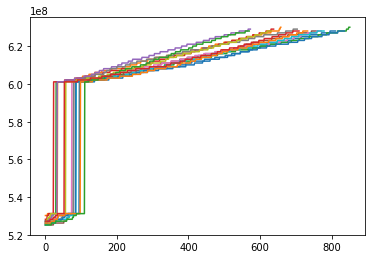

In [203]:
for animal in animal_and_vals.keys():
    plt.plot(animal_and_vals[animal])

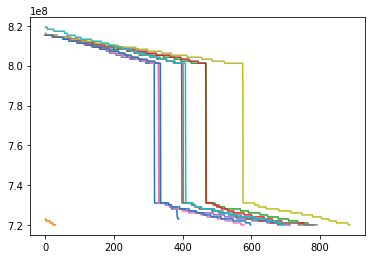

In [204]:
for animal in animal_and_vals_2.keys():
    plt.plot(animal_and_vals_2[animal])

In [211]:
c2.head()

,Unnamed: 0,Timestamp,RFID,Wedge,Reader,Location,Mouse,Genotype,AssignedWedge,Date,Week,Day,Hour,Minute,Second
0,1,819210515,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,5,15,5
1,2,819210501,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,5,1,14
2,3,819210438,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,4,38,30
3,4,819210419,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,4,19,7
4,5,819210318,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,3,18,0


In [207]:
# for a given animal, get more info - plot x=day, y=#
animal

'48 54 51 55 57 54'

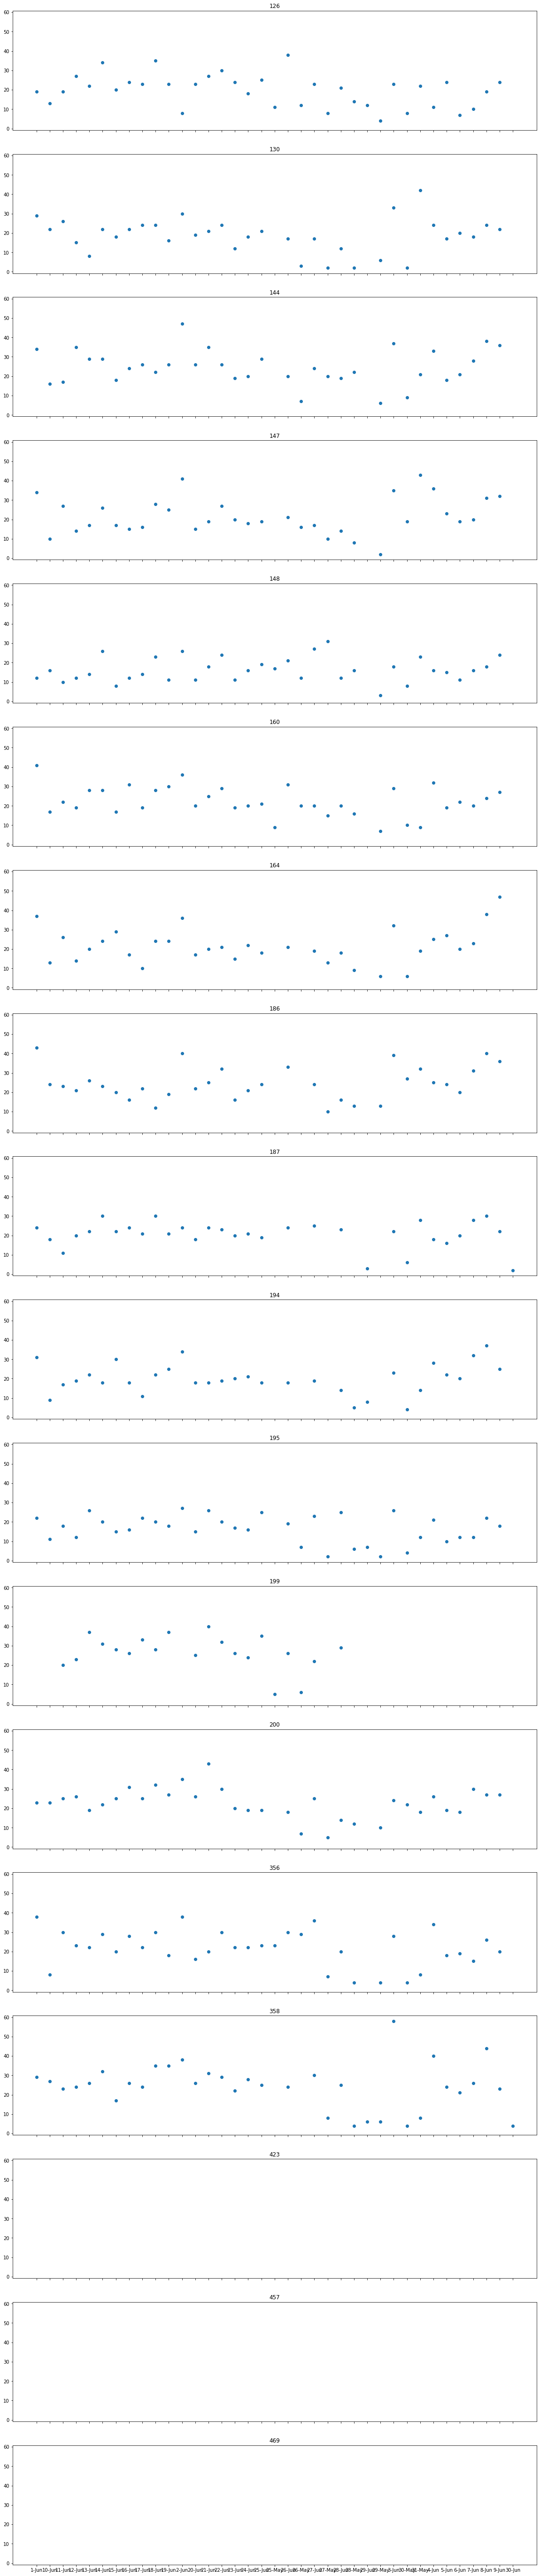

In [286]:
n_max=len(np.unique(c1.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,100),sharex=True,sharey=True)

for animal in np.unique(c1.Mouse):
    n+=1
    c1_sub=c1[c1.Mouse==animal]
    c1_sub=c1_sub[c1_sub.Location=="Feeder"]
    c1_sub=c1_sub[c1_sub.AssignedWedge=='Wedge 6']
    forplot=c1_sub[["Day","Hour"]].groupby(["Day"]).count()
    axs[n].scatter(forplot.index,forplot["Hour"])
    axs[n].title.set_text(animal)


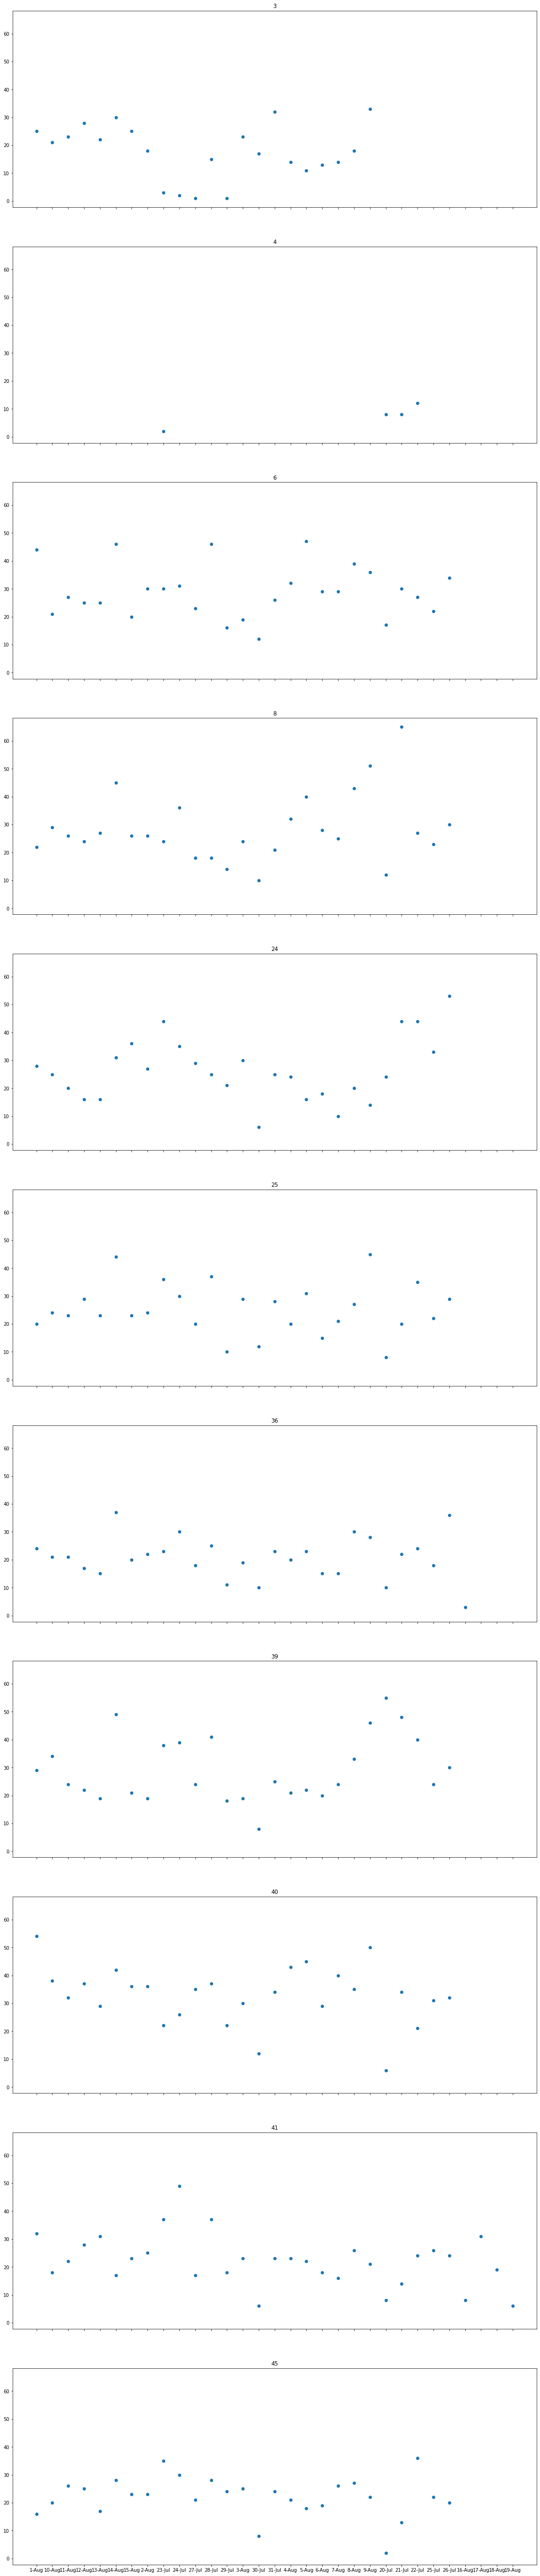

In [285]:
n_max=len(np.unique(c2.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,100),sharex=True,sharey=True)

for animal in np.unique(c2.Mouse):
    n+=1
    c2_sub=c2[c2.Mouse==animal]
    c2_sub=c2_sub[c2_sub.Location=="Feeder"]
    c2_sub=c2_sub[c2_sub.AssignedWedge=='Wedge 6']
    forplot=c2_sub[["Day","Hour"]].groupby(["Day"]).count()
    axs[n].scatter(forplot.index,forplot["Hour"])
    axs[n].title.set_text(animal)


In [331]:
c1_clean = c1[c1.Location=="Feeder"]
c1_clean=c1_clean[c1_clean.AssignedWedge=='Wedge 6']
c2_clean = c2[c2.Location=="Feeder"]
c2_clean=c2_clean[c2_clean.AssignedWedge=='Wedge 6']


In [332]:
c1_grouped=c1_clean[['Mouse','Week','Genotype']].groupby(['Mouse','Week'],as_index=False).agg('count')
c2_grouped=c2_clean[['Mouse','Week','Genotype']].groupby(['Mouse','Week'],as_index=False).agg('count')

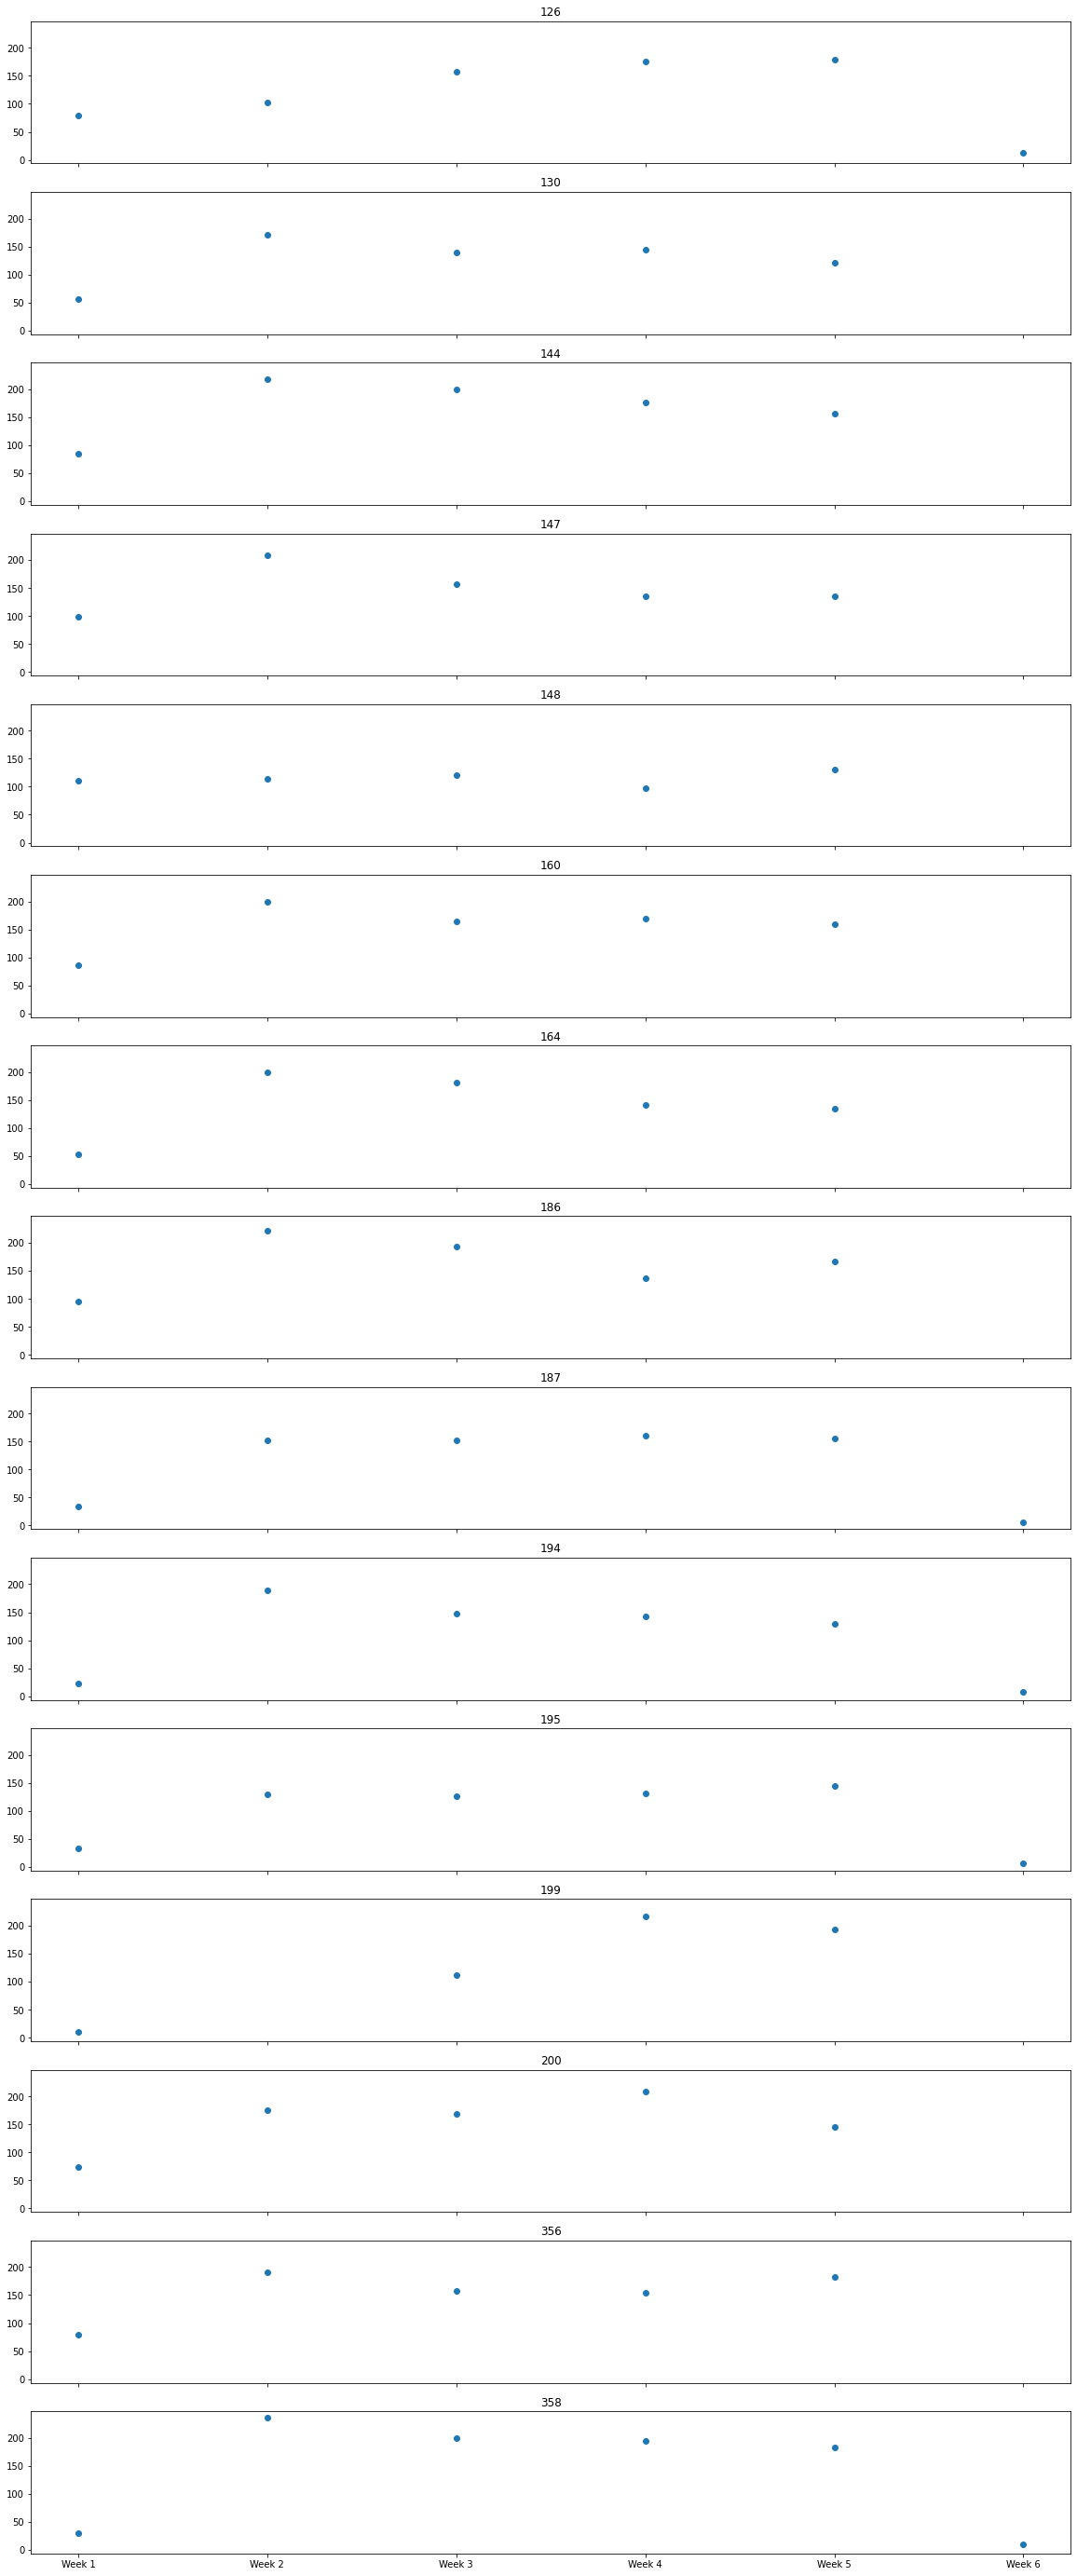

In [335]:
test=c1_grouped

n_max=len(np.unique(test.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,50),sharex=True,sharey=True)

for animal in np.unique(test.Mouse):
    n+=1
    forplot=test[test.Mouse==animal]
    axs[n].scatter(forplot.Week,forplot.Genotype)
    axs[n].title.set_text(animal)


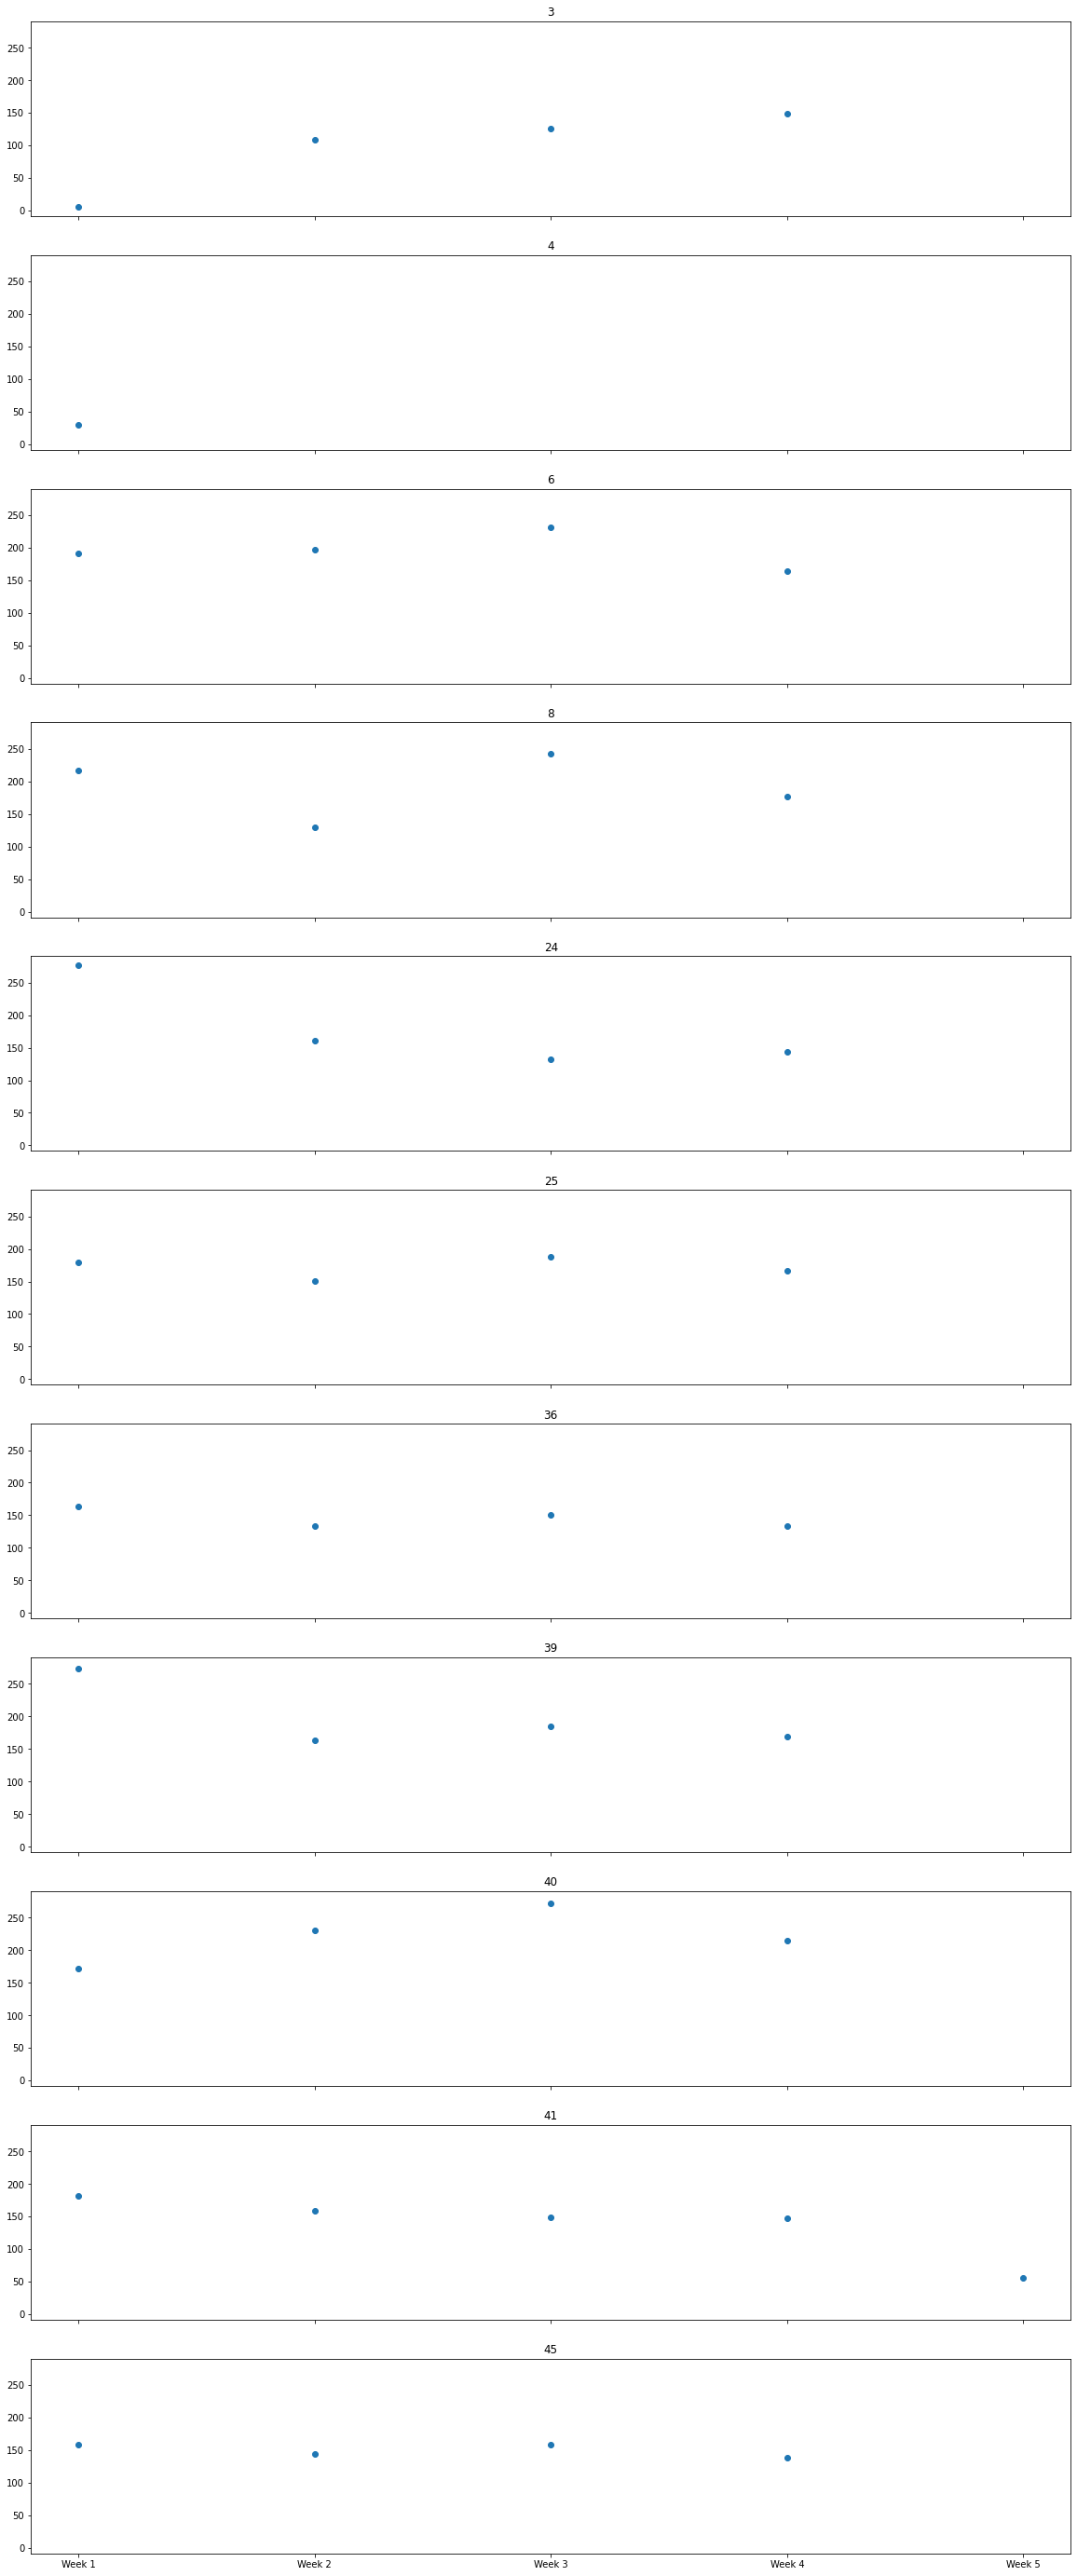

In [336]:
test=c2_grouped

n_max=len(np.unique(test.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,50),sharex=True,sharey=True)

for animal in np.unique(test.Mouse):
    n+=1
    forplot=test[test.Mouse==animal]
    axs[n].scatter(forplot.Week,forplot.Genotype)
    axs[n].title.set_text(animal)
